## Writing my own News Article

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
import sys

np.random.seed(30)
%matplotlib inline

In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())

2.6.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
df=pd.read_csv("BBC News Train.csv",nrows=100)

In [4]:
df[df['Category']=='tech'].count()

ArticleId    19
Text         19
Category     19
dtype: int64

In [5]:
file=open("Tech_News.txt","w")

In [6]:
for i in df['Text']:
    file.write(i)
file.close()

In [7]:
fileName="Tech_News.txt"
rawText=open(fileName,'r').read()
rawText.lower()[:20]

'worldcom ex-boss lau'

In [8]:
chars=sorted(list(set(rawText)))
charToInt=dict((c,i) for i,c in enumerate(chars))

In [9]:
n_chars=len(rawText)
n_vocab=len(chars)
print("Total Characters:",n_chars,"\nTotal Vocab:",n_vocab)

Total Characters: 215189 
Total Vocab: 51


In [10]:
charToInt

{' ': 0,
 '!': 1,
 '$': 2,
 '%': 3,
 '&': 4,
 '(': 5,
 ')': 6,
 '-': 7,
 '.': 8,
 '/': 9,
 '0': 10,
 '1': 11,
 '2': 12,
 '3': 13,
 '4': 14,
 '5': 15,
 '6': 16,
 '7': 17,
 '8': 18,
 '9': 19,
 ':': 20,
 ';': 21,
 '[': 22,
 ']': 23,
 'a': 24,
 'b': 25,
 'c': 26,
 'd': 27,
 'e': 28,
 'f': 29,
 'g': 30,
 'h': 31,
 'i': 32,
 'j': 33,
 'k': 34,
 'l': 35,
 'm': 36,
 'n': 37,
 'o': 38,
 'p': 39,
 'q': 40,
 'r': 41,
 's': 42,
 't': 43,
 'u': 44,
 'v': 45,
 'w': 46,
 'x': 47,
 'y': 48,
 'z': 49,
 '£': 50}

In [11]:
seqLength=100
X=[]
y=[]

for i in range(0,n_chars-seqLength):
    inSequence=rawText[i:i+seqLength]
    outSequence=rawText[i+seqLength]
    X.append([charToInt[c] for c in inSequence])
    y.append([charToInt[outSequence]])

n_patterns=len(X)
print("Total Patterns:",n_patterns)

Total Patterns: 215089


In [12]:
X[0],y[0]

([46,
  38,
  41,
  35,
  27,
  26,
  38,
  36,
  0,
  28,
  47,
  7,
  25,
  38,
  42,
  42,
  0,
  35,
  24,
  44,
  37,
  26,
  31,
  28,
  42,
  0,
  27,
  28,
  29,
  28,
  37,
  26,
  28,
  0,
  35,
  24,
  46,
  48,
  28,
  41,
  42,
  0,
  27,
  28,
  29,
  28,
  37,
  27,
  32,
  37,
  30,
  0,
  29,
  38,
  41,
  36,
  28,
  41,
  0,
  46,
  38,
  41,
  35,
  27,
  26,
  38,
  36,
  0,
  26,
  31,
  32,
  28,
  29,
  0,
  25,
  28,
  41,
  37,
  32,
  28,
  0,
  28,
  25,
  25,
  28,
  41,
  42,
  0,
  24,
  30,
  24,
  32,
  37,
  42,
  43,
  0,
  24,
  0,
  25,
  24],
 [43])

In [13]:
# X needs to be reshaped to be [samples, time_steps, features]

X=np.reshape(X,(n_patterns,seqLength,1))
X=X/float(n_vocab)
y=np_utils.to_categorical(y)

In [14]:
X[0],y[0]

(array([[0.90196078],
        [0.74509804],
        [0.80392157],
        [0.68627451],
        [0.52941176],
        [0.50980392],
        [0.74509804],
        [0.70588235],
        [0.        ],
        [0.54901961],
        [0.92156863],
        [0.1372549 ],
        [0.49019608],
        [0.74509804],
        [0.82352941],
        [0.82352941],
        [0.        ],
        [0.68627451],
        [0.47058824],
        [0.8627451 ],
        [0.7254902 ],
        [0.50980392],
        [0.60784314],
        [0.54901961],
        [0.82352941],
        [0.        ],
        [0.52941176],
        [0.54901961],
        [0.56862745],
        [0.54901961],
        [0.7254902 ],
        [0.50980392],
        [0.54901961],
        [0.        ],
        [0.68627451],
        [0.47058824],
        [0.90196078],
        [0.94117647],
        [0.54901961],
        [0.80392157],
        [0.82352941],
        [0.        ],
        [0.52941176],
        [0.54901961],
        [0.56862745],
        [0

In [15]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [16]:
filepath = "./models/weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint= ModelCheckpoint(
    filepath, 
    monitor="val_loss",
    verbose=2,
    save_best_only=True,
    mode="min")

callbacksList=[checkpoint]

In [17]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


In [18]:
# model=tf.keras.models.load_model("./models/weights-improvement-20-2.1267.hdf5")

In [19]:
X_train,y_train=X[:250000],y[:250000]
X_val,y_val=X[250000:],y[250000:]

In [20]:
history=model.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_val,y_val),callbacks=callbacksList)

Epoch 1/30
6722/6722 [==============================] - 53s 7ms/step - loss: 2.8193 - accuracy: 0.2089
Epoch 2/30
6722/6722 [==============================] - 50s 7ms/step - loss: 2.7053 - accuracy: 0.2317
Epoch 3/30
6722/6722 [==============================] - 50s 7ms/step - loss: 2.6489 - accuracy: 0.2403
Epoch 4/30
6722/6722 [==============================] - 49s 7ms/step - loss: 2.5993 - accuracy: 0.2513
Epoch 5/30
6722/6722 [==============================] - 49s 7ms/step - loss: 2.5528 - accuracy: 0.2629
Epoch 6/30
6722/6722 [==============================] - 49s 7ms/step - loss: 2.5050 - accuracy: 0.2748
Epoch 7/30
6722/6722 [==============================] - 49s 7ms/step - loss: 2.4605 - accuracy: 0.2870
Epoch 8/30
6722/6722 [==============================] - 49s 7ms/step - loss: 2.4151 - accuracy: 0.2978
Epoch 9/30
6722/6722 [==============================] - 49s 7ms/step - loss: 2.3754 - accuracy: 0.3101
Epoch 10/30
6722/6722 [==============================] - 49s 7ms/step - l

Text(0.5, 1.0, 'Text Generation')

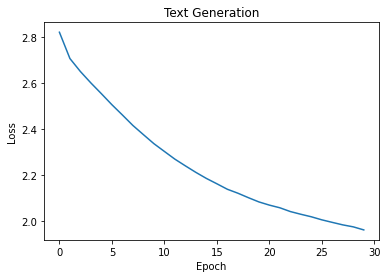

In [22]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Text Generation')

Text(0, 0.5, 'Accuracy')

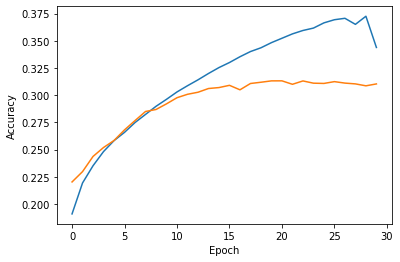

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


In [ ]:
np.random.seed(30)
start =np.random.randint(0,len(X_train)-1)
intToChar=dict((i,c) for i,c in enumerate(chars))
pattern=list(X_train[start])
print("Seed:")
print("/","".join([intToChar[int(value*n_vocab)] for value in pattern]))
for i in range(1000):
    x=np.reshape(pattern,(1,len(pattern),1))
    prediction=model.predict(x,verbose=0)
    index=np.argmax(prediction)
    result=intToChar[index]
    pattern.append([index/n_vocab])
    print(result,end="")

Seed:
/ ing, sir." His agitation was so great that he could hardly
speak, and the shadows sprang up and down
 the sooe of the moor. Tee was aedin and see oateet  and the madd of the mant oa the mant of the moor. Tee was an the manter of the moor, and the hare was she aarente and see ane thet th had been and mested an the mant. 
"I whs  sir," 
"Yol moot that the was a ceatiet of the moor  and I have neter that he was a serini of the moor  and the hart was aelin the mast oe the moor  and the hart was soanenn and tee aarente and see hert aadk and aelir and aeanns  and the mas who was aor  and the wordd sae hool the sooe of the moor  and the hart oa the carene which had been to the moor. Tee was aedin and see oateet  and the madd of the mant oa the mant of the moor. Tee was an the manter of the moor, and the hare was she aarente and see ane thet th had been and mested an the mant. 
"I whs  sir," 
"Yol moot that the was a ceatiet of the moor  and I have neter that he was a serini of the moo